Import necessary libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("imdb_top_1000.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [4]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [5]:
df.shape

(1000, 16)

Strategy 1: Deleting the null rows:

In [6]:
df_del = df.dropna()
df_del.shape

(714, 16)

In [7]:
df_del.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [20]:
#Drop NaNs in df_del (make sure it's reassigned)
df_del = df_del.dropna().reset_index(drop=True)

In [9]:

df_encoded = pd.DataFrame()


le = LabelEncoder()
encode_cols = [
    'Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
    'Runtime', 'Genre', 'Overview', 'Director',
    'Star1', 'Star2', 'Star3', 'Star4', 'Gross'
]

for col in encode_cols:
    df_encoded[col] = le.fit_transform(df_del[col].astype(str))


df_encoded['IMDB_Rating'] = df_del['IMDB_Rating']
df_encoded['Meta_score'] = df_del['Meta_score']
df_encoded['No_of_Votes'] = df_del['No_of_Votes']


print(df_encoded.isnull().sum())
df_encoded

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
Overview         0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
Gross            0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
dtype: int64


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross,IMDB_Rating,Meta_score,No_of_Votes
0,13,630,56,0,42,117,653,103,434,404,59,657,332,9.3,80.0,2343110
1,4,562,34,0,72,105,328,100,305,4,238,147,124,9.2,100.0,1620367
2,76,547,70,11,52,17,693,59,89,195,0,451,554,9.0,84.0,2303232
3,192,563,36,0,88,105,574,100,5,462,497,147,576,9.0,90.0,1129952
4,195,1,19,9,114,105,92,338,184,327,383,297,446,9.0,96.0,689845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,594,218,33,4,57,158,102,335,381,225,511,416,619,7.6,77.0,30144
710,288,297,32,3,44,38,79,44,95,536,148,97,19,7.6,50.0,45338
711,213,586,29,9,97,59,350,392,357,502,369,81,138,7.6,65.0,166409
712,694,17,26,9,105,99,522,302,242,436,194,540,114,7.6,96.0,40351


Strategy 1 : Considering all features for prediction

In [10]:
X = df_encoded.drop(['Series_Title', 'Overview', 'IMDB_Rating'], axis=1)
y = df_encoded[['IMDB_Rating']]
print(X.shape,y.shape)

(714, 13) (714, 1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(535, 13) (179, 13) (535, 1) (179, 1)


In [12]:
lr1 = LinearRegression()
lr1.fit(X, y)
lr1.score(X, y)

0.536061583525052

Analysis of Correlation

In [13]:
df_encoded.corr()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross,IMDB_Rating,Meta_score,No_of_Votes
Poster_Link,1.000000,-0.047706,-0.249429,-0.089856,-0.004342,0.037486,-0.016549,0.068563,0.027778,-0.043772,-0.029016,-0.038096,0.013751,0.028415,0.005607,-0.078760
Series_Title,-0.047706,1.000000,-0.010045,0.005116,0.049561,-0.050465,0.062714,-0.019708,0.009184,0.014847,0.001249,-0.006350,-0.001352,0.024300,0.003790,0.067178
Released_Year,-0.249429,-0.010045,1.000000,0.195027,-0.059073,-0.125157,0.084878,-0.025454,0.008167,0.000335,-0.010561,0.010439,-0.025354,-0.177531,-0.267991,0.194350
Certificate,-0.089856,0.005116,0.195027,1.000000,0.011481,-0.151135,-0.003224,0.035284,0.036419,-0.036927,0.003263,0.018290,-0.025638,-0.079467,-0.065303,-0.012737
Runtime,-0.004342,0.049561,-0.059073,0.011481,1.000000,-0.037330,0.089480,0.114757,0.032851,0.050107,-0.008285,0.035525,-0.020013,0.075397,0.061794,0.017732
Genre,0.037486,-0.050465,-0.125157,-0.151135,-0.037330,1.000000,-0.092659,-0.029007,-0.020262,0.016465,0.008530,0.065887,-0.008859,0.038654,0.101958,-0.183998
Overview,-0.016549,0.062714,0.084878,-0.003224,0.089480,-0.092659,1.000000,0.060061,0.018007,0.070234,-0.039059,0.006303,0.009799,-0.002512,-0.013967,0.008493
Director,0.068563,-0.019708,-0.025454,0.035284,0.114757,-0.029007,0.060061,1.000000,0.055046,0.025550,0.052270,-0.042704,0.003683,-0.020905,-0.040024,-0.038633
Star1,0.027778,0.009184,0.008167,0.036419,0.032851,-0.020262,0.018007,0.055046,1.000000,-0.001114,-0.027120,-0.027686,-0.065822,0.034125,-0.030483,0.001493
Star2,-0.043772,0.014847,0.000335,-0.036927,0.050107,0.016465,0.070234,0.025550,-0.001114,1.000000,0.008611,0.038379,0.014546,0.030269,-0.013212,-0.052303


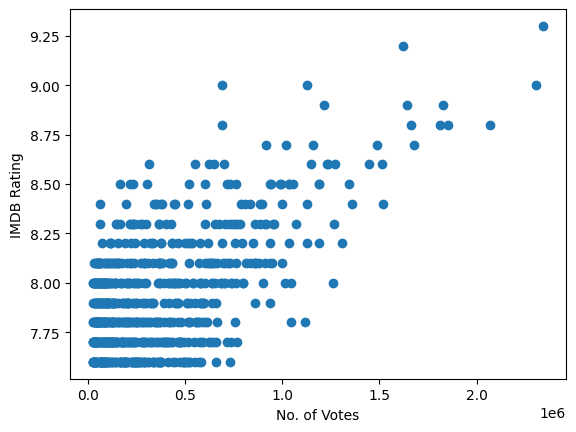

In [14]:
plt.scatter(df_encoded['No_of_Votes'], df_encoded['IMDB_Rating'])
plt.xlabel('No. of Votes')
plt.ylabel('IMDB Rating')
plt.show()

Strategy 2 : Using Less Featues

In [15]:
X = df_encoded[['Gross','Runtime', 'Meta_score', 'No_of_Votes']]
y = df_encoded[['IMDB_Rating']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(535, 4) (179, 4) (535, 1) (179, 1)


In [17]:
lr2 = LinearRegression()
lr2.fit(X, y)
lr2.score(X, y)

0.4595396120277404

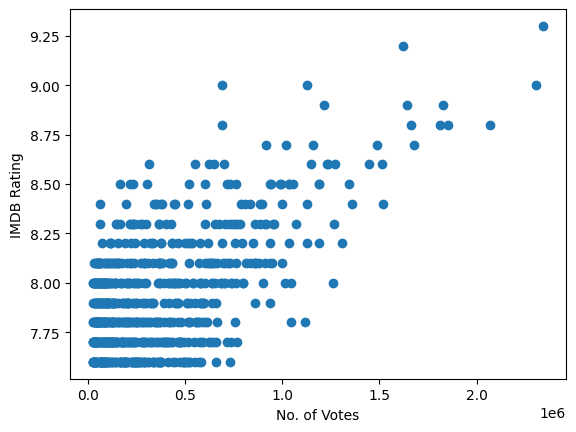

In [18]:
plt.scatter(X['No_of_Votes'], y)
plt.xlabel('No. of Votes')
plt.ylabel('IMDB Rating')
plt.show()